# Getting started with JAC

**A brief note ahead to the user about this and other Jupyter notebooks for JAC:** In order improve the *appearance* of the individual cell-outputs of this and other notebooks and to better read/display the *wide tables* from the various interactive calls and computations, you can create or modify the file ~/.jupyter/custom/custom.css in your home directory and add the line: $\quad$ div.output_area pre { font-size: 7pt;}. Overall, however, the detailed appearance of all fonts and details is not alway easy to control, unfortunately.



In [12]:
# using Pkg; Pkg.activate(joinpath(@__DIR__, ".."))   # activate the JAC environment
using JAC

Welcome to **JAC**, the **Jena Atomic Calculator**, that provides various tools for performing atomic (structure) calculations of different kind and complexity. Apart from the computation of atomic (many-electron) amplitudes, properties and processes, JAC supports interactive, restricted-active space (RAS) and cascade computations. It also help perform a few simple *hydrogenic* and *semi-empirical* estimates as well as simplify symbolic expressions from Racah's algebra. --- Use  `?JAC`  for some more information on this module.

In [14]:
? JAC

search: JAC



`module JAC`       ... Jena Atomic Calculator (JAC) provides tools for performing atomic (structure) calculations at various degrees of complexity          and sophistication. It has been designed to not only calculate atomic level structures and properties [such as g-factors or         hyperfine and isotope-shift parameters] but also transition amplitudes between bound-state levels [for the anapole moment, dipole          operator, electron electric-dipole moment, parity non-conservation, etc.] and, in particular, (atomic) transition probabilities,          Auger rates, photoionization cross sections, radiative and dielectronic recombination rates as well as cross sections for many          other (elementary) processes. JAC also facilitates interactive computations, the simulation of atomic cascades, the time-evolution          of statistical tensors, a few semi-empirical estimates of atomic properties as well as the simplification of symbolic expressions         from Racah's algebra. – In addition, the JAC module supports the display of level energies, electron and photon spectra,          radial orbitals and and other atomic data.

**`Perform (atomic) computations of different complexity:`**       JAC will eventually support **ten kinds** of computations which can be summarized as follows:

  * Atomic computations, based on explicitly specified electron configurations.
  * Restricted active-space computations (RAS; partly implemented).
  * Interactive computations.
  * Atomic cascade computations (partly implemented).
  * Atomic representations (Green and close-coupling functions, complex rotation; not yet implemented).
  * Atomic responses (not yet implemented).
  * Atomic descriptors for machine learning algorithms (not yet implemented).
  * Time-evolution of statistical tensors in (intense) light pusles (not yet implemented).
  * Semi-empirical estimates of cross sections, etc. (partly implemented).
  * Symbolic evaluation of expressions from Racah's algebra, etc. (partly implemented).

**`Further details and information`**

```
    + Kinds of atomic implementation                                       [cf. ? Details.kindsOfComputation]
    + Atomic amplitudes (partly) implemented in JAC                        [cf. ? Details.amplitudes]
    + Atomic level properties (partly) implemented in JAC                  [cf. ? Details.properties]
    + Atomic processes (partly) implemented in JAC                         [cf. ? Details.processes]
    + Interactive use of JAC procedures                                    [cf. ? Details.interactive]
    + Design principles and limitations of the JAC program                 [cf. ? Details.design]
    + Data types, structs and name conventions of the JAC module           [cf. ? Details.datatypes]
    + Atomic cascade computations and approximations                       [cf. ? Details.decayCascades]
    + Use of (em) light pulses in the time evolution of statist. tensors   [cf. ? Details.pulses]
    + Why Julia ?                                                          [cf. ? Details.whyJulia]
```


For instance, use  `? Details.properties`   or others for further but still compact details.

In [3]:
? Details.properties

**`Atomic properties`**

Apart from approximate level energies and eigenvectors, JAC (will) support the computation of the following level properties:

  * AlphaX        ... alpha variations; differential sensitivity parameters.
  * Einstein      ... Einstein A, B coefficients and oscillator strength; although these coefficients are not an                    original level property, the Einstein module treats these computations within a single                    basis/multiplet and, hence, cannot include relaxation effects, etc. The Einstein                    feature of JAC can be used, however, for a quick overview to transition probabilities                    or in order to simplify cascade computations.
  * FormF         ... Standard and modified atomic form factors.
  * Greens        ... Greens function of an atomic level.
  * HFS           ... Hyperfine A and B parameters.
  * Isotope       ... Isotope shift M and F parameters.
  * LandeJ        ... Lande g_J factors.
  * LandeF        ... Lande g_F factors.
  * Polarity      ... Static and dynamic polarizibilities of atomic levels.
  * Plasma        ... CI computations including interactions from various plasma models.
  * Yields        ... Fluoerescence and Auger yields of atomic levels.


In the design of JAC, we first of all **aim for a precise language** that (i) is simple enough for both, seldom and a more frequent use of this package, (ii) highlights the underlying physics and (iii) avoids most technical slang that is often unnecessary but quite common to many other codes. An intuitive picture about the level or hyperfine structure of an atom, its properties as well as possible excitation and/or decay processes should (always) come first in order to generate all desired data: By making use of suitable data types (struct), **we indeed wish to introduce a language close to the underlying formalism.** --- While JAC is overall based on a rather large number $(> 200)$ of such types, a few simple examples are:

  + (atomic) `Shell`:                 $\quad$1s, 2s, 2p, ...
  + `Subshell`:                       $\quad$1s_1/2, 2s_1/2, 2p_1/2, 2p_3/2, ...
  + (electron) `Configuration`:       $\quad$1s^2 2s^2 2p^6 3s $\quad$  or $\quad$  [Ne] 3s, ...
  + `Level`:                          $\quad$1s^2 2s^2  ^1S_0, ...
  
and many other types that we shall explain later.  


Let us simply start, for instance, with specifying and assigning the $1s$ and $2p$ shells:

In [19]:
w1s = Shell("1s")
w2p = Shell("3d")

3d

Similarly, we can readily specify and assign any (relativistic) subshell:

In [22]:
wa = Subshell("2p_1/2"),   Subshell("5p_3/2")  

(2p_1/2, 5p_3/2)

In [24]:
typeof(wa)

Tuple{Subshell,Subshell}

In JAC, we make use of these `Shell`'s and `Subshell`'s whenever they will naturally occur in describing the excitation, decay or occupation of an atom, and both at input and output.

Moreover, we can interactively also specify any configuration, such as:

In [26]:
wc1 = Configuration("1s^2 2s^2 2p^5")
wc2 = Configuration("[Ar] 4s 3d^6")

Configuration: 1s^2 2s^2 2p^6 3s^2 3p^6 3d^6 4s^1 

In [27]:
typeof(wc2)

Configuration

These are just three (very) simple examples which show how the details of some computation can easily be specified in line with our basic understanding of the atomic shell model. One can use  `? Details.datatypes`  to see a more complete list of most data structures that are speficic to the JAC module ... and which we just list here for a very **first impression about the size of the JAC program**.

In [7]:
? Details.datatypes

**`Data types, structs and name conventions of the JAC module`**

The use of a proper terminology and data structures has been found essential for developing the JAC module. Below, we list and briefly explain these data types and how they appear in atomic theory. Although we presently support just a (small) number of frequently requested *tasks* in  atomic structure and collision theory, we tried to define data types that are flexible enough to further extend these tools in the future. Following the Julia's standard conventions, all types (struct) are named in CamelCase notation.

### `Abstract data types`

  * AbstractExcitationScheme     ... supports the selection of various (singleton) excitation schemes.
  * AbstractQedModel             ... supports the selection of various (singleton) QED models.

### `Basic data types`

  * AngularJ64                   ... (positive, half-integer) angular momentum, j = 0, 1/2, 1, 3/2, ... .
  * AngularM64                   ... (half-integer) projection of ang. momentum, m = -1/2, 0, 1/2, ... can be initialized also                                   w.r.t AngularJ64().
  * CartesianVector              ... Cartesian vector of given type.
  * ContinuumNormalization       ... method for dealing with the normalization of continuum orbitals.
  * ContinuumPhase               ... method for determining the phase of continuum orbitals.
  * ContinuumSolutions           ... method for solving continuum orbitals.
  * Eigen                        ... represents eigenvalues and eigenvectors if different diagonalization procedures are used.
  * EmMultipole                  ... a multipole of the em field.
  * EmGauge                      ... an allowed gauge form for the em field, for instance, Coulomb, Babushkin, Magnetic, ...
  * EmProperty                   ... a given property in Coulomb (velocity) as well as Babushkin (length) gauge.
  * EmStokes                     ... (computed) Stokes parameter for the polarization of emitted radiation.
  * ExpStokes                    ... (experimentally) given Stokes parameter for the polarization of incoming radiation.
  * Guint                        ... specifier for dealing with graphical user interfaces (GUI).
  * LevelKey                     ... data type for identifying a level by its symmetry, energy, etc.
  * LevelSymmetry                ... total level symmetry (J, parity).
  * LineKey                      ..  data type for identifying a line by the keys of the initial and final level, ...
  * Model                        ... to keep the all nuclear parameters.
  * Parity                       ... standard parity values
  * Shell                        ... a non-relativistic shell.
  * SolidAngle`                  ... defines a type for a solid angle Omega = (theta, phi).
  * Subshell                     ... a relativistic subshell.
  * SubshellStateR               ... a relativistic antisymmetric subshell state within the seniority scheme.
  * TensorComp                   ... component of the statistical tensor as associated with an atomic level.
  * UseGauge                     ... an allowed gauge form requested for explicit computations: UseCoulomb or UseBabushkin.
  * Warnings                     ... for dealing with warnings that are made during a run or REPL session.
  * WeightedCartesian            ... Cartesian vector with weight factor of given type.

### `Data types from many-electron theory`

  * AsfSettings                  ... settings for SCF and CI computations.
  * Atomic.Computation           ... atomic computation of a multiplet, including the SCF, CI and transition properties.
  * Basis                        ... (relativistic) atomic basis, including the configuration space and radial orbitals.
  * Bspline                      ... set of B-splines.
  * Configuration                ... (non-relativistic) electron configuration as specified by its shells and their occupation.
  * ConfigurationR               ... (relativistic) electron configuration as specified by its subshells and their occupation.
  * Level                        ... atomic level in terms of its quantum number, energy and a (possible) representation.
  * Multiplet                    ... an ordered list of atomic levels with a name.
  * Orbital                      ... (relativistic) radial orbital function that appears as 'building block' to define many-electron                                    states; more often than not, it just occurs as radial orbital on a given (radial) grid while the                                    angular dependence is given by the subshell label.
  * QedPetersburg                ... singleton data type for selecting QED calculations a la St. Petersburg.
  * QedSydney                    ... singleton data type for selecting QED calculations a la Sydney.
  * NoneQed                      ... singleton data type if no QED corrections are to be calculated.
  * Radial.Grid                  ... radial grid to represent the (radial) orbitals.
  * Radial.Potential             ... radial potential function.
  * Radial.Primitives            ... a list of radial functions, that may serve as a set of primitives in SCF computations, together                                    with several parameters for its definition.
  * Radial.SingleSymOrbitals     ... a list of radial orbitals with large and small component but of the same symmetry (kappa); such a                                    list may serves as (complete) single-electron basis to deal with second- and higher-order processes.

### `Data types calculating level properties`

  * AbstractLevelProperty        ... an atomic level property that is supported by the JAC module, such as HFS, IsotopeShift, ....
  * Einstein.Settings            ... settings for Einstein A and B coefficients, calculated within a single given Multiplet.
  * Einstein.Outcome             ... (results of the) Einstein A and B coefficients for a single line.
  * Hfs.Settings                 ... settings for HFS A and B coefficients.
  * Hfs.Outcome                  ... (results of the) HFS A and B coefficients for a single level.
  * IsotopeShift.Outcome         ... (results of the) M and F isotope-shift parameters for a single level.
  * IsotopeShift.Settings        ... settings for the M and F isotope-shift parameters.
  * LandeZeeman.sublevelJ        ... specifies a magnetic sublevel with well-defined J.
  * LandeZeeman.sublevelF        ... specifies a magnetic hyperfine sublevel with well-defined F, M_f.
  * LandeZeeman.Outcome          ... (results of the) Lande factors and Zeeman splittings for a single level.
  * LandeZeeman.Settings         ... settings for the Lande factors and Zeeman splitting in an external magnetic field.
  * PlasmaShift.PlasmaModel      ... Model for dealing with the plasma environment.
  * PlasmaShift.Outcome          ... (results of the) plasma shifts and energies for a single level.
  * PlasmaShift.Settings         ... settings for including plasma interactions into the CI matrix.

### `Data types for calculating (time-independent) atomic processes`

  * AtomicProcess                     ... an atomic process that is supported by the JAC module, such as Auger, photo, ....
  * AlphaVariation.Outcome            ... outcome of a alpha-variation computation, such as the K enhancement.
  * AlphaVariation.Settings           ... seetings for computing alpha variation parameters.
  * Auger.Channel                     ... Auger channel of well-defined energy and partial outgoing wave.
  * Auger.Line                        ... Auger line between (two) specified initial- and final-state levels and with (possible) subchannels.
  * Auger.Settings                    ... settings for computing Auger lines.
  * CoulombExcitation.Channel         ... Coulomb excitation channel of well-defined energy and partial wave.
  * CoulombExcitation.Line            ... Coulomb excitation line with (possible) subchannels.
  * CoulombExcitation.Settings        ... settings for computing Coulomb excitation  lines.
  * CoulombIonization.Channel         ... Coulomb ionization channel of well-defined energy and partial wave.
  * CoulombIonization.Line            ... Coulomb ionization line with (possible) subchannels.
  * CoulombIonization.Settings        ... settings for computing Coulomb ionization  lines.
  * Dielectronic.Channel              ... dielectronic-recombination channel of well-defined multipolarity and gauge as well as energy and                                        partial incoming wave.
  * Dielectronic.Line                 ... dielectronic recombination line between (three) specified initial-, intermediate and final-state                                        levels and with (possible) subchannels.
  * Dielectronic.Resonance            ... single dielectronic resonance that summarizes all Dielectronic.Line's for some fixed intermediate                                       level within the continuum.
  * Dielectronic.Settings             ... settings for computing dielectronic recombination lines.
  * DecayYield.Outcome                ... outcome of a decay yield computation.
  * DecayYield.Settings               ... settings for computing decay yields lines.
  * DoubleAuger.Channel               ... DoubleAuger channel of two partial outgoing waves with well-defined energy.
  * DoubleAuger.Line                  ... DoubleAuger line between (two) specified initial- and final-state levels and with (possible)                                        subchannels.
  * DoubleAuger.Settings              ... settings for computing DoubleAuger lines.
  * ImpactExcitation.Channel          ... electron-impact excitation channel of well-defined energies. partial waves and phases of the                                        incoming and outgoing electrons.
  * ImpactExcitation.Line             ... electron-impact excitation line between (two) specified initial- and final-state levels and with                                        (possible) subchannels.
  * ImpactExcitation.Settings         ... settings for computing electron-impact excitation lines.
  * ImpactExcitationAutoion.Channel   ... electron-impact excitation channel of well-defined energies, partial waves and phases of the                                        incoming and outgoing electrons.
  * ImpactExcitationAutoion.Pathway   ... electron-impact excitation line between (two) specified initial- and final-state levels and with                                        (possible) subchannels.
  * ImpactExcitationAutoion.Settings  ... settings for computing electron-impact excitation lines.
  * ImpactIonization.Channel          ... electron-impact ionization channel of well-defined energies, partial waves and phases of the                                        incoming and outgoing electrons.
  * ImpactIonization.Line             ... electron-impact ionization line between (two) specified initial- and final-state levels and with                                        (possible) subchannels.
  * ImpactIonization.Settings         ... settings for computing electron-impact ionization lines.
  * MultiPhotonDeExcitation.Channel   ... multi-photon excitation or decay channel with well-defined multipolarities and gauge.
  * MultiPhotonDeExcitation.Line      ... multi-photon excitation or decay line between (two) specified initial- and final-state levels                                        and with (possible) subchannels.
  * MultiPhotonDeExcitation.Settings  ... settings for computing multi-photon excitation or decay lines.
  * MultiPhotonIonization.Channel     ... multi-photon ionization channel with well-defined multipolarities, gauge as well as energy and                                        partial wave of the outgoing electron.
  * MultiPhotonIonization.Line        ... multi-photon ionization line between (two) specified initial- and final-state levels and with                                        (possible) subchannels.
  * MultiPhotonIonization.Settings    ... settings for computing multi-photon ionization lines.
  * MultiPhotonDoubleIon.Channel      ... multi-photon double ionization channel with well-defined multipolarities, gauge as well as energy                                       and partial waves of the (two) outgoing electrons.
  * MultiPhotonDoubleIon.Line         ... multi-photon double ionization line between (two) specified initial- and final-state levels and                                        with (possible) subchannels.
  * MultiPhotonDoubleIon.Settings     ... settings for computing multi-photon double ionization lines.
  * PairAnnihilation1Photon.Channel   ... positron-bound-electron pair annihilation (PEPA) with single-photon emission channel of                                        well-defined multipolarity, gauge as well as energy and partial incoming (positron) wave.
  * PairAnnihilation1Photon.Line      ... PEPA with single-photon emission line between (two) specified initial- and final-state levels and                                        with (possible) subchannels.
  * PairAnnihilation1Photon.Settings  ... settings for computing PEPA with single-photon emission lines.
  * PairAnnihilation2Photon.Channel   ... positron-bound-electron pair annihilation (PEPA) with two-photon emission channel of well-defined                                        multipolarities, gauge as well as energy and partial incoming (positron) wave.
  * PairAnnihilation2Photon.Line      ... PEPA with two-photon emission line between (two) specified initial- and final-state levels and                                        with (possible) subchannels.
  * PairAnnihilation2Photon.Settings  ... settings for computing PEPA with two-photon emission lines.
  * PairProduction.Channel            ... positron-bound-electron pair production (PEPP) by single-photon absorption channel of well-defined                                        multipolarity, gauge as well as energy and partial outgoing (positron) wave.
  * PairProduction.Line               ... PEPP by single-photon absorption line between (two) specified initial- and final-state levels and                                        with (possible) subchannels.
  * PairProduction.Settings           ... settings for computing PEPP lines.
  * PhotoExcitation.Line              ... photoexcitation line between (two) specified initial- and final- state levels and with (possible                                       JAC.PhotoEmission.Channel) subchannels.
  * PhotoExcitation.Settings          ... settings for computing photoexcitation lines.
  * PhotoExcitationAutoion.Channel    ... photo-excitation autoionization channel of well-defined energies of the incoming photon as well as                                        the partial wave and phase of the outgoing electron.
  * PhotoExcitationAutoion.Pathway    ... photo-excitation autoionization pathways between (three) specified initial-, intermediate and                                        final-state levels and with (possible) subchannels.
  * PhotoExcitationAutoion.Settings   ... settings for computing photo-excitation autoionization pathways.
  * PhotoIonization.Channel           ... photoionization channel of well-defined multipolarity, gauge as well as energy and partial                                        outgoing wave.
  * PhotoIonization.Line              ... photoionization line between (two) specified initial- and final-state levels and with (possible)                                        subchannels.
  * PhotoIonization.Settings          ... settings for computing photoionization lines.
  * PhotoRecombination.Channel        ... Rec channel of well-defined multipolarity and gauge as well as energy and partial incoming wave.
  * PhotoRecombination.Line           ... radiative electron capture line between (two) specified initial- and final-state levels and with                                        (possible) subchannels.
  * PhotoRecombination.Settings       ... settings for computing radiative electron capture lines.
  * PhotoEmission.Channel                 ... radiative channel of well-defined multipolarity and gauge.
  * PhotoEmission.Line                    ... radiative line between (two) specified initial- and final-state levels and with (possible) sublines.
  * PhotoEmission.Settings                ... settings for computing radiative lines.
  * RadiativeAuger.Channel            ... RadiativeAuger channel of a partial outgoing waves and one photon with well-defined energy.
  * RadiativeAuger.Line               ... RadiativeAuger line between (two) specified initial- and final-state levels and with (possible)                                        subchannels.
  * RadiativeAuger.Settings           ... settings for computing RadiativeAuger lines.
  * Radiative.Settings                ... settings for computing radiative lines.
  * RayleighCompton.Channel           ... RayleighCompton channel of an incoming and outgoing photon with well-defined energy.
  * RayleighCompton.Line              ... RayleighCompton line between (two) specified initial- and final-state levels and with (possible)                                        subchannels.
  * RayleighCompton.Settings          ... settings for computing RayleighCompton lines.
  * REDA.Channel                      ... resonant electron-excitation (sequential) double-autoionization (REDA) channel of well-defined                                        energies, partial waves and phases of the incoming and outgoing electrons.
  * REDA.Pathway                      ... resonant electron-excitation (sequential) double-autoionization (REDA) pathways.between (four)                                        specified initial-, (two) intrmediate and final-state levels and with (possible) subchannels.
  * REDA.Settings                     ... settings for computing resonant electron-excitation (sequential) double-autoionization (REDA)                                        pathways.

### `Data types for calculating (time-dependent) atomic processes`

  * Pulse.Envelope                       ... defines a type for the envelope (function) of an em pulse with well-defined time delay,                                            amplitude and (normalized) shape function.
  * Pulse.ExperimentalCharacterization   ... to characterized an experimental or physically described em pulse in terms of its                                            propagation direction, frequency, maximum intensity, pulse length or No. of cycles, time-delay,                                            polarization, etc., i.e. of what is easily accesssible by an experiment.
  * Pulse.Gaussian                       ... a Gaussian light pulse that is used for evaluating time-dependent statistical tensors.
  * Pulse.Polarization                   ... defines the polarization of an em pulse in terms of its linear and circular degrees, the                                            direction of the polarization vector or some generalized polarization coefficients.
  * Pulse.PolarizationType               ... defines the polarization of an experimentally described light pulse as linear, left-circular, ..
  * Pulse.Shape                          ... defines a shape of a general em pulse as Gaussian, SineSquared, etc.
  * Pulse.SineSquared                    ... a SinSquared light pulse that is used for evaluating time-dependent statistical tensors.

### `Data types for dealing wiht (time-dependent) statistical tensors`

  * Statistical.ResonanceR      ... a resonance state in the continuum with a well-defined bound-ionic core, one or several electrons                                    in the continuum, a widths as well as a loss rate due to *additional* decay processes that cannot be                                    accounted for explicitly.
  * Statistical.Tensor          ... represents a statistical tensor of given rank k, projection q and which generally depends upon two                                    resonances.

### `Data types for advanced computations`

  * Atomic.CasComputation          ... an individual or a series of systematically enlarged SCF computations.
  * Atomic.CasStep                 ... single-step in an (systematically enlarged) SCF calculation.
  * Atomic.CasSettings             ... settings for CAS computation.
  * Cascade.Approach               ... a particular (computational) approach in which a cascade is considered.
  * Cascade.Block                  ... a block of configurations that are treatet together within a given cascade.
  * Cascade.Data                   ... all transition data of a cascade as given by a list of lines (of different type).
  * Cascade.Computation            ... definition of an atomic exciation/decay cascade from which the actual computations can be derived.
  * Cascade.Level (mutable)        ... defines a level specification for dealing with cascade transitions.
  * Cascade.LineIndex              ... defines a line index with regard to the various lineLists of data::Cascade.Data.
  * Cascade.Step                   ... an individual step of a Cascade.Computation that generally combines two ionization states of ions.
  * Cascade.Simulation             ... simulation of cascade data.
  * Cascade.SimulationSettings     ... defines settings for performing the simulation of some cascade (data).
  * Cascade.Settings               ... settings for cascade computations (not yet).


If you are not yet *convinced* about the advantages of Julia, you may ask also `? JAC.whyJulia`:

In [8]:
? Details.whyJulia

**`Why Julia ?`**

Here, we recall a few remarks from the literature as well as some own experience why Julia is helpful for developing the JAC program.  Many of these arguments have been adapted from the paper by Bezanson et al. (2017) and by Post and Kendall (2004):

  * Julia stands for the combination of productivity and performance through a careful language design and carefully chosen technologies;    it never forces the user to resort to C or Fortran for fast computations. – Julia's design allows for gradual learning of modern concepts    in scientific computing; from a manner familiar to many users and towards well-structured and high-performance code. In Julia, however,   it is sometimes beliefed that class-based methods are not scientifically powerful enough to express full abstraction in scientific computing.
  * `High-level languages`: Most traditional high-level languages are hampered by the overhead from the interpretor and which typically results into                           more run-time processing that are strictly necessary. One of these hindrances is (missing) type information, and which                           then results in the request for supporting vectorization. Julia is a 'verb'-based language in contrast to most                            object-oriented 'noun'-based language, in which the generic functions play a more important role than the datatypes.
  * `Code selection`: Julia name space allows the use of the same vocabulary in different circumstances, and which makes programs easier to read.                   In particular, it uses the same mechanism of code selection at the lowest and highest levels and is therefore able to select                   the right method, either already at compile time or later at run time.
  * `Multiple dispatch`: refers to the dynamically selected implementation and to the concept of running the right code at the right time.                       This is achieved by overloading by multiple-argument function, a very powerful abstraction. Multiple dispatch makes                        it easier to structure the programs close to the underlying science. It also reduces the needs for argument checking                       at the begin of a function. The overloading of functions by multiple dispatch is also called ad-hoc polymophism.                       Instead of encapsulating methods inside classes, Julia's multiple dispatch is a paradigm in wich methods are defined on                       combinations of data types (classes). Julia shows that this is remarkably well-suited for numerical computing.
  * `Code re-use`: In good language design, on should be able to write a general implementation and, as long as the necessary operations are                   available, the code should just work.
  * `Type system`: Julia's expressive type system that allows opional type annotations; this type system supports an agressive code specializiation                   against run-time types. Over a large extent, however, Julia code can be used without any mentioning of types (in contrast to                   C and Fortran); this is achieved by data-flow interference.– User's own types are also first class in Julia, that is there                    is not meaningful distinction between built-in and user-defined types. There are mutable and (default: immutable)                    composite types.
  * `Parallelization`: One of the central motivation to built Julia was the design of a parallel computing language. Therefore, Julia provides                       different facilities for parallelism. Two important concepts are 'remote calls'  and 'remote references'; cf.                       @parallel. In contrast, vectorization is in Julia NOT considered as a pre-requisite for performance.
  * `Performance`: There are helpful macros, such as @timing function*call(parameters) or @benchmark function*call(parameters) to analyze the                   performance of the program and to find (and resolve) bottlenecks.
  * `Code developers`: In numerical and scientific computing, people with special skills are sometimes called library or package writers, while                    many others just use these libraries and packages.
  * `LAPACK`: All of LAPACK is available in Julia, not just the most common functions. LAPACK wrappers are fully implemented by 'ccall' and can           be called directly from the Julia promt.
  * `Macros`: A macro is a function that runs at parse time. It takes symbolic expressions in and returns transformed expressions out, which are           inserted into the code for later compilation. The output of macros is often 'inlined' into the code.
  * `Physical models`: However, better physics is more important than better computer science. It is recommended to use modern but well-proven                       computer-science techniques, and a 'physics code' should not be a computer-science research project. Instead, one should                       use best engineering practices to improve quality rather tha processes. Emphasis should be given to improvements of the                        physics capabilities. Do not use the latest computer-science features; let the new ideas mature first. Better physics is the                       most important product of the code.
  * The scale of code-development can be truly immense; a good overview/quantitative database about (previously) successful software projects is   required for good estimation for resources and schedules. It is easy to loose motivation on a project that last years and which has few   incremental deliveries.
  * `Success criteria`: One of the important success criteria is the costumer focus. What do the user really need.
  * `Visualization`: Visualization of large data sets is essential for debugging, problem generation and analysis of results.
  * `Code evolution`: Continues replacement of code modules is recommended as better tools and techniques are developed. Every code development                   typically proceeds in steps: First develop a core capability (with a small team) and let this small core be tested by users                    and, if successful, add further capabilities (so-called incremental delivery).
  * `Team work`: Good teams are more important than good processes; they are characterized by the ability to share ideas and to work informally               together. The chracks need to evolve into senior mentors and code architects who communicate their vision and expertise. –- Poor                performers not only do not complete their work, they also tend to impede and discourage others.
  * `Code specification`: Some flexibility in the requirement specification phase is essential because it is difficult to predict when (or if) a                        new algorithm/approach will be available. There is a need to pursue multiple approaches for algorithms and modules near                        to the critical path. If one approach is not feasible, another one can be used.
  * `Quality tests`: If a code is not verified and validated by proper examples, the users will not believe and see its connection to reality.                    Therefore, develop and execute a verification and validation program.


In [13]:
using PyPlot

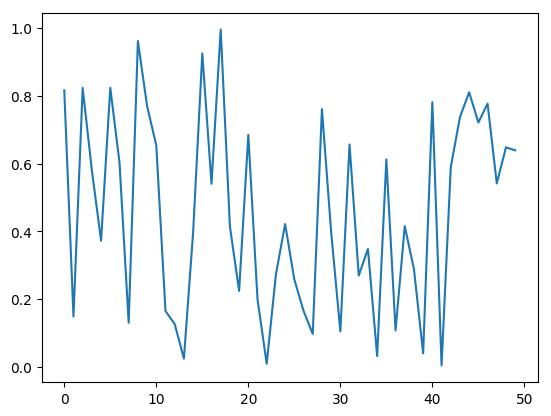

In [10]:
r = rand(50); plot(r); show()

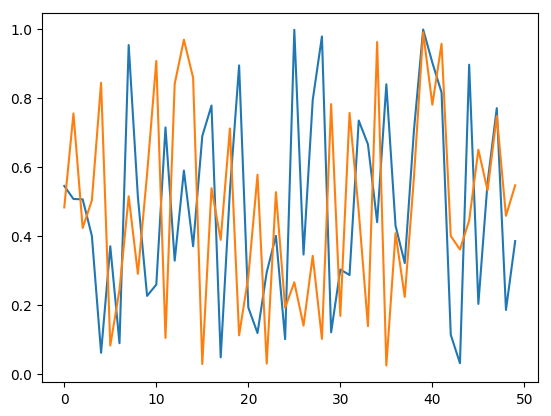

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2b165740f0>

In [11]:
r = rand(50); s = rand(50); plot(r); plot(s)